<a href="https://colab.research.google.com/github/Jramirezm942/Diagnostico_Integral/blob/main/Master_Modelo_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Se agrega  esta celda para poder cargar los archivos desde Cloud Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Cargando el DataSet de Imagenes Originales de Kaggle (50px X 50px)
Este dataset se descargo desde Kaggle : https://www.kaggle.com/datasets/paultimothymooney/breast-histopathology-images

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image

# Directorio base donde están almacenadas todas las imágenes
base_dir = '/content/drive/MyDrive/TFM/data/'


image_data = []
image_labels = []

# Recorrer todas las carpetas dentro del directorio base
for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path):
        for label in ['0', '1']:  # Subcarpetas de clases
            class_folder = os.path.join(folder_path, label)
            if os.path.isdir(class_folder):
                # Listar todas las imágenes en la subcarpeta
                for image_file in os.listdir(class_folder):
                    image_path = os.path.join(class_folder, image_file)
                    try:
                        # Cargar imagen
                        img = Image.open(image_path)
                        # Convertir la imagen a un arreglo NumPy
                        img_array = np.array(img)
                        # Guardar la información de la imagen y su etiqueta
                        image_data.append(img_array)
                        image_labels.append(int(label))
                    except Exception as e:
                        print(f"No se pudo cargar la imagen {image_path}: {e}")

# Convertir a un DataFrame de pandas
image_df = pd.DataFrame({'image': image_data, 'label': image_labels})

# Mostrar las primeras filas del DataFrame
print(image_df.head(25))

                                                image  label
0   [[[243, 216, 226], [237, 213, 230], [236, 208,...      0
1   [[[243, 226, 234], [249, 242, 245], [239, 234,...      0
2   [[[231, 178, 201], [237, 196, 212], [238, 192,...      0
3   [[[245, 232, 238], [236, 231, 236], [132, 81, ...      0
4   [[[227, 163, 192], [216, 132, 167], [229, 159,...      0
5   [[[198, 119, 160], [218, 124, 162], [215, 130,...      0
6   [[[214, 113, 149], [196, 119, 162], [185, 120,...      0
7   [[[178, 119, 164], [124, 85, 140], [194, 141, ...      0
8   [[[247, 235, 240], [233, 195, 211], [224, 140,...      0
9   [[[201, 148, 184], [200, 133, 167], [203, 130,...      0
10  [[[158, 114, 161], [164, 109, 151], [144, 105,...      0
11  [[[243, 244, 243], [245, 238, 240], [245, 240,...      0
12  [[[212, 119, 159], [194, 89, 136], [217, 146, ...      0
13  [[[228, 154, 186], [220, 123, 159], [223, 140,...      0
14  [[[243, 238, 242], [240, 215, 224], [246, 243,...      0
15  [[[219, 144, 175], [

**Este código es fundamental para preparar el conjunto de datos de imágenes antes de realizar cualquier análisis o modelado, asegurando que todas las imágenes se carguen correctamente.**

In [ ]:
import pandas as pd

# Tenemos DataFrame llamado `image_df`
# Guarda el DataFrame en un archivo Pickle
image_df.to_pickle('/content/drive/MyDrive/TFM/processed_images_1.pkl'

In [ ]:
print(image_df.head(15))

                                                image  label
0   [[[243, 216, 226], [237, 213, 230], [236, 208,...      0
1   [[[243, 226, 234], [249, 242, 245], [239, 234,...      0
2   [[[231, 178, 201], [237, 196, 212], [238, 192,...      0
3   [[[245, 232, 238], [236, 231, 236], [132, 81, ...      0
4   [[[227, 163, 192], [216, 132, 167], [229, 159,...      0
5   [[[198, 119, 160], [218, 124, 162], [215, 130,...      0
6   [[[214, 113, 149], [196, 119, 162], [185, 120,...      0
7   [[[178, 119, 164], [124, 85, 140], [194, 141, ...      0
8   [[[247, 235, 240], [233, 195, 211], [224, 140,...      0
9   [[[201, 148, 184], [200, 133, 167], [203, 130,...      0
10  [[[158, 114, 161], [164, 109, 151], [144, 105,...      0
11  [[[243, 244, 243], [245, 238, 240], [245, 240,...      0
12  [[[212, 119, 159], [194, 89, 136], [217, 146, ...      0
13  [[[228, 154, 186], [220, 123, 159], [223, 140,...      0
14  [[[243, 238, 242], [240, 215, 224], [246, 243,...      0


**Se convirtio el DataFrame "image_df" a un archivo extencion .pkl debido a que tomaba mucho tiempo cargar cada vez que se modificaba un pedazo de codigo. de esta manera se ahorra tiempo al momento de ejecutar el codigo**

# Analisis descriptivo

Distribución de clases:
label
0    162203
1     65154
Name: count, dtype: int64


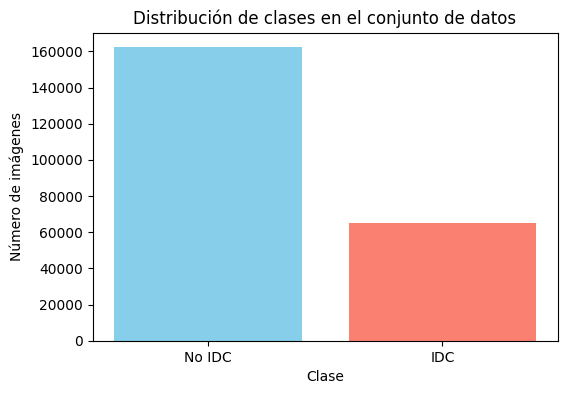


Dimensiones de las imágenes:
              Height          Width  Channels
count  227357.000000  227357.000000  227357.0
mean       49.887248      49.994581       3.0
std         1.856430       0.421379       0.0
min         1.000000       2.000000       3.0
25%        50.000000      50.000000       3.0
50%        50.000000      50.000000       3.0
75%        50.000000      50.000000       3.0
max        50.000000      50.000000       3.0

Estadísticas de intensidad de color:
                Mean            Std            Min            Max
count  227357.000000  227357.000000  227357.000000  227357.000000
mean      184.455817      37.662952      51.122112     244.050682
std        28.197960       8.989563      25.157964       6.557641
min         1.849200       1.134575       0.000000       5.000000
25%       163.768000      31.676910      33.000000     242.000000
50%       186.737067      36.510065      48.000000     245.000000
75%       208.434667      42.522406      66.000000     2

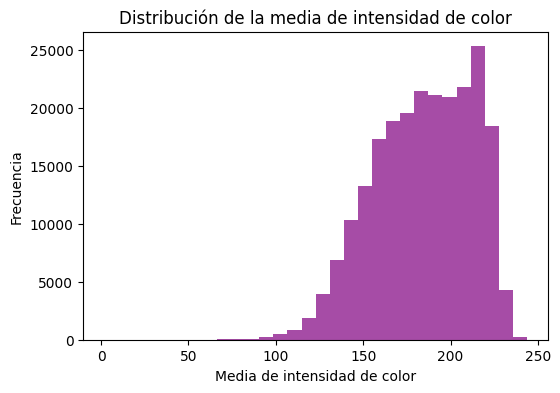

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el DataFrame desde el archivo Pickle
image_df = pd.read_pickle('/content/drive/MyDrive/TFM/processed_images_1.pkl')

import matplotlib.pyplot as plt
import pandas as pd

# 1. Distribución de clases
class_counts = image_df['label'].value_counts()
print("Distribución de clases:")
print(class_counts)

# Visualizar la distribución de clases
plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, class_counts.values, color=['skyblue', 'salmon'])
plt.xticks([0, 1], ['No IDC', 'IDC'])
plt.xlabel('Clase')
plt.ylabel('Número de imágenes')
plt.title('Distribución de clases en el conjunto de datos')
plt.show()

# 2. Verificación de dimensiones de imágenes
dimensions = [img.shape for img in image_df['image']]
dimension_df = pd.DataFrame(dimensions, columns=['Height', 'Width', 'Channels'])
print("\nDimensiones de las imágenes:")
print(dimension_df.describe())

# 3. Estadísticas de intensidad de color
pixel_stats = []
for img in image_df['image']:
    pixel_stats.append([img.mean(), img.std(), img.min(), img.max()])

pixel_stats_df = pd.DataFrame(pixel_stats, columns=['Mean', 'Std', 'Min', 'Max'])
print("\nEstadísticas de intensidad de color:")
print(pixel_stats_df.describe())

# Visualizar la distribución de la media de intensidad
plt.figure(figsize=(6, 4))
plt.hist(pixel_stats_df['Mean'], bins=30, color='purple', alpha=0.7)
plt.xlabel('Media de intensidad de color')
plt.ylabel('Frecuencia')
plt.title('Distribución de la media de intensidad de color')
plt.show()

**
1.	Distribución de Clases:
	•	El conjunto de datos tiene un desequilibrio de clases significativo, con 162,203 imágenes de la clase “No IDC” (sin cáncer) y 65,154 imágenes de la clase “IDC” (con cáncer). Esto indica que hay más del doble de imágenes de “No IDC” en comparación con “IDC”. Esta distribución debe ser considerada al entrenar el modelo para evitar sesgos hacia la clase mayoritaria.


  2.	Dimensiones de las Imágenes:
	•	Todas las imágenes tienen dimensiones de 50x50 píxeles con 3 canales de color, lo que confirma la homogeneidad en el tamaño de las imágenes del conjunto de datos. Sin embargo, este tamaño relativamente pequeño puede limitar la capacidad del modelo para aprender características más complejas de las imágenes.


  3.	Estadísticas de Intensidad de Color:
	•	El análisis de la intensidad de color muestra que la media de la intensidad de los píxeles es de aproximadamente 184.46 con una desviación estándar de alrededor de 28.19. Esto sugiere que la mayoría de las imágenes tienen tonos de color medios a altos. El histograma de la media de intensidad de color muestra una distribución relativamente sesgada hacia los valores más altos de intensidad, lo que indica una mayor prevalencia de tonos claros en las imágenes.**

# Redimensionar las Imágenes a 224x224 Píxeles
**Se Redimensionaron las imagenes para que el Modelo de ML pueda entender mejor las imagenes. usando la Herramienta MATLAB debido a que con Google Colab no era suficiente la RAM.**

In [ ]:
% Directorio base de entrada y salida
inputBaseDir = '/Users/administrador/Desktop/datasets';
outputBaseDir = '/Users/administrador/Desktop/data_resize';

% Obtener lista de carpetas principales (carpetas numeradas)
mainFolders = dir(inputBaseDir);
mainFolders = mainFolders([mainFolders.isdir] & ~ismember({mainFolders.name}, {'.', '..'}));  % Excluir '.' y '..'

% Iterar sobre cada carpeta numerada
for i = 1:length(mainFolders)
    currentFolder = fullfile(inputBaseDir, mainFolders(i).name);

    % Obtener las subcarpetas de clase '0' y '1'
    classFolders = dir(currentFolder);
    classFolders = classFolders([classFolders.isdir] & ~ismember({classFolders.name}, {'.', '..'}));  % Excluir '.' y '..'

    % Iterar sobre cada subcarpeta de clase
    for j = 1:length(classFolders)
        classFolder = fullfile(currentFolder, classFolders(j).name);
        outputClassFolder = fullfile(outputBaseDir, mainFolders(i).name, classFolders(j).name);

        % Crear carpeta de salida si no existe
        if ~exist(outputClassFolder, 'dir')
            mkdir(outputClassFolder);
        end

        % Obtener lista de imÃ¡genes en la subcarpeta
        imageFiles = dir(fullfile(classFolder, '*.png'));  % Cambia la extensiÃ³n si es necesario

        % Redimensionar todas las imÃ¡genes
        for k = 1:length(imageFiles)
            % Leer la imagen
            imagePath = fullfile(classFolder, imageFiles(k).name);
            img = imread(imagePath);

            % Redimensionar la imagen a 224x224
            resizedImg = imresize(img, [224, 224]);

            % Guardar la imagen redimensionada en el directorio de salida
            outputImagePath = fullfile(outputClassFolder, imageFiles(k).name);
            imwrite(resizedImg, outputImagePath);

            % Mostrar progreso
            fprintf('Imagen %d de %d en carpeta %s, clase %s redimensionada y guardada.\n', ...
                k, length(imageFiles), mainFolders(i).name, classFolders(j).name);
        end
    end
end

disp('Redimensionamiento completo.');

**Aqui se asegura que todas las imágenes se procesen a un tamaño estándar de 224x224 píxeles, que es el requerido por la mayoría de los modelos de Deep Learning. La herramienta MATLAB se utiliza debido a limitaciones de recursos en Google Colab para manejar grandes cantidades de datos.**

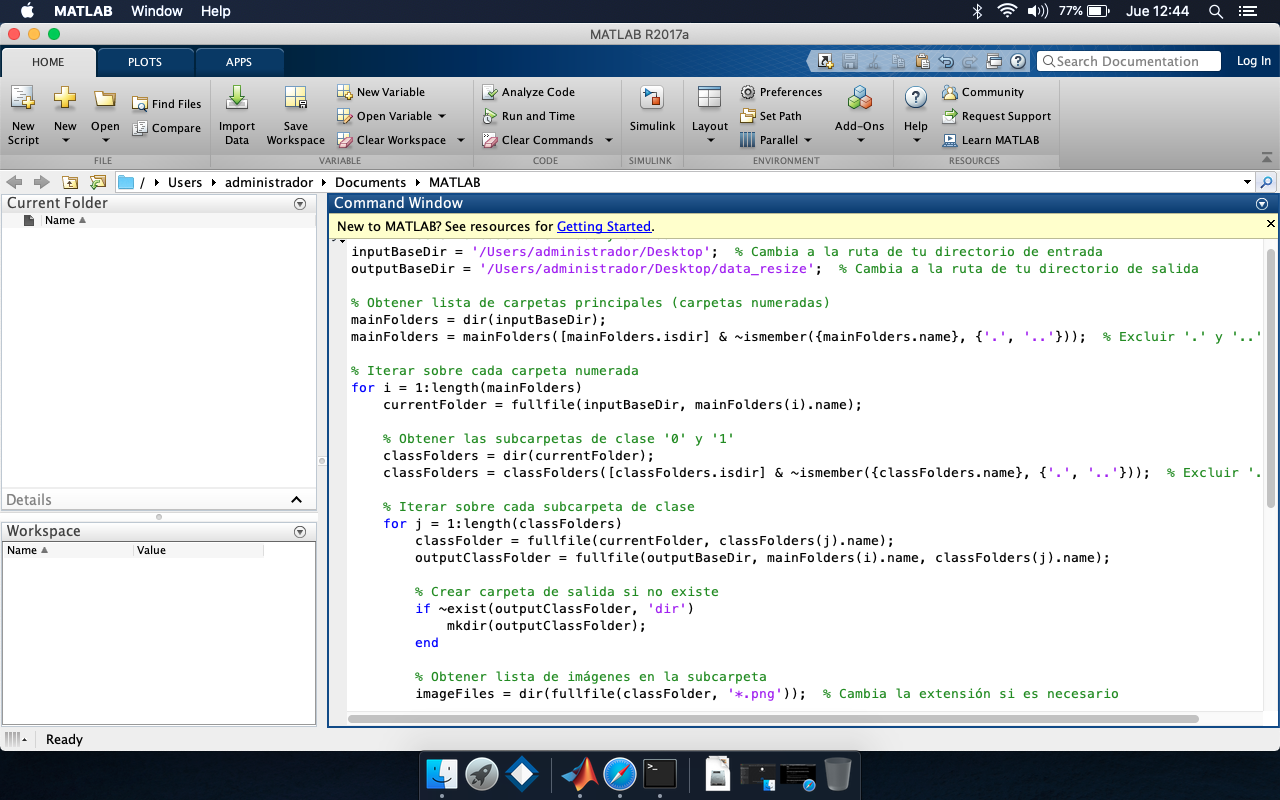

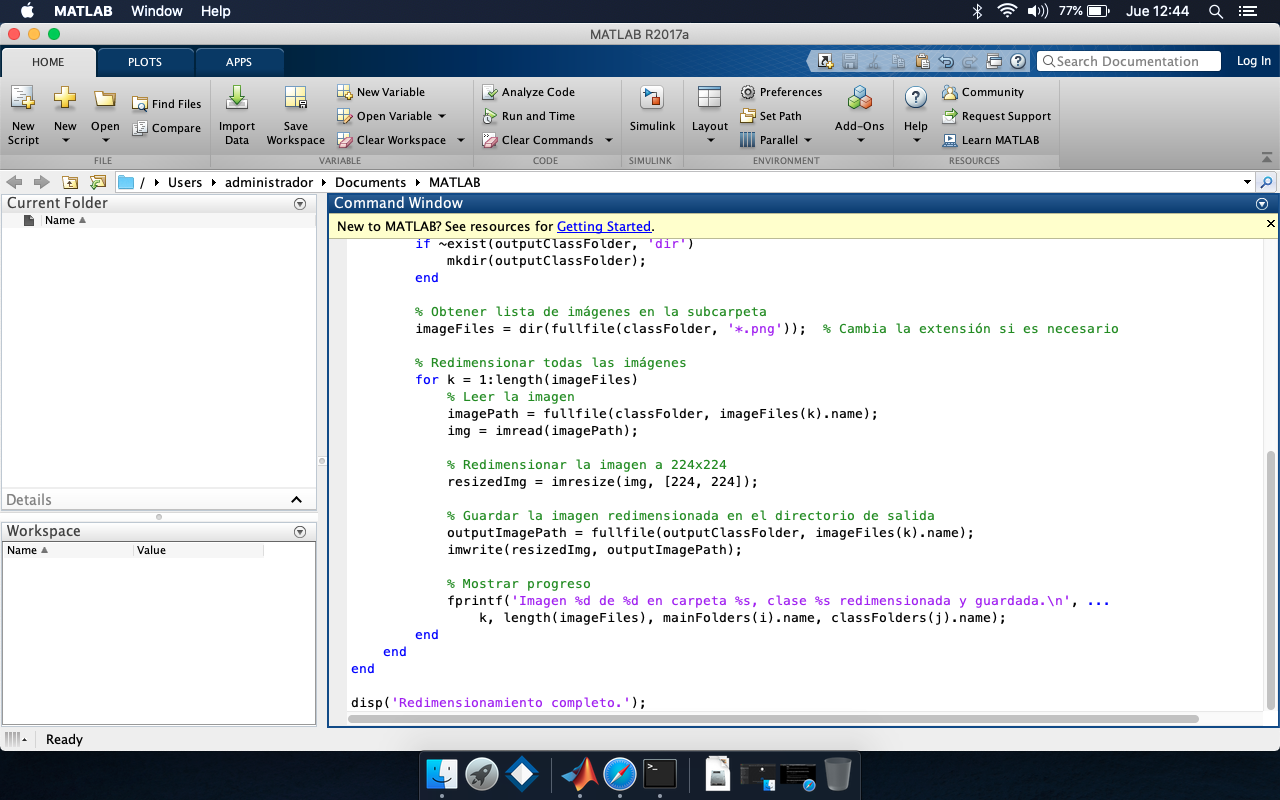

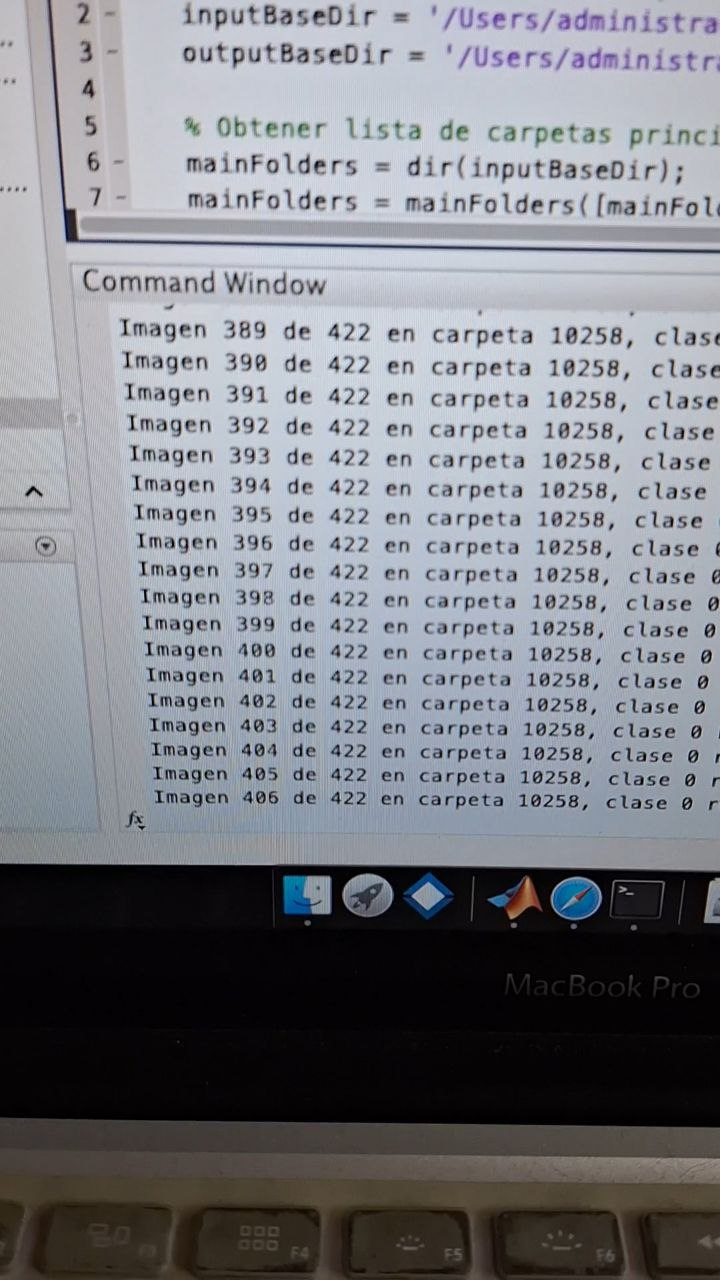

# Aqui se carga el DF procesado con las imagenes de 224 px

In [ ]:
import pandas as pd

# Cargar el DataFrame desde el archivo Pickle guardado en Google Drive
image_df = pd.read_pickle('/content/drive/MyDrive/TFM/balanced_images.pkl')

# Ahora `image_df` está disponible y puedes continuar con el procesamiento
print(image_df.head(15))  # Verifica que el DataFrame se haya cargado correctamente

                                                image  label
0   [[[198, 107, 149], [198, 107, 149], [198, 107,...      0
1   [[[204, 136, 170], [205, 136, 170], [205, 136,...      0
2   [[[243, 237, 244], [243, 237, 243], [243, 237,...      0
3   [[[192, 66, 97], [193, 68, 100], [195, 74, 105...      0
4   [[[176, 122, 155], [177, 120, 153], [179, 117,...      0
5   [[[146, 77, 122], [148, 79, 124], [151, 84, 12...      0
6   [[[237, 236, 237], [237, 236, 237], [237, 236,...      0
7   [[[212, 106, 144], [212, 107, 145], [213, 110,...      0
8   [[[235, 170, 195], [235, 172, 196], [235, 175,...      0
9   [[[240, 231, 239], [241, 232, 239], [241, 234,...      0
10  [[[232, 198, 214], [231, 196, 213], [229, 192,...      0
11  [[[233, 184, 204], [232, 184, 204], [232, 184,...      0
12  [[[217, 122, 150], [216, 123, 151], [213, 123,...      0
13  [[[216, 156, 195], [216, 156, 195], [216, 156,...      0
14  [[[101, 62, 123], [100, 61, 122], [98, 59, 119...      0


# Una vez MATLAB redimensiono las imagenes a 224x224 Píxeles se procedio a realizar el metodo de "Data Argumentation" debido a que la distribucion esta desequilibrada. (Existen muchos mas imagenes seleccionadas como No Cancer)

# Data Argumentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Verificar y filtrar las imágenes que tienen las dimensiones correctas (224x224x3)
correct_shape = (224, 224, 3)
minority_class_images = [img for img in image_df[image_df['label'] == 1]['image'].values if img.shape == correct_shape]

# Verificar si hay imágenes con forma incorrecta
if len(minority_class_images) == 0:
    raise ValueError("No se encontraron imágenes con la forma correcta (224x224x3). Verifique el tamaño de las imágenes.")

# Convertir a array de numpy
minority_class_images = np.stack(minority_class_images)

# Lista para almacenar las imágenes augmentadas
augmented_images = []
augmented_labels = []

# Generar imágenes augmentadas
for img in minority_class_images:
    img = img.reshape((1,) + img.shape)  # Redimensionar para el flujo de datos
    i = 0
    for batch in datagen.flow(img, batch_size=1):
        augmented_images.append(batch[0].astype(np.uint8))
        augmented_labels.append(1)  # La clase sigue siendo 1 (minoritaria)
        i += 1
        if i >= 5:  # Número de augmentaciones por imagen original
            break

# Convertir las listas de imágenes y etiquetas a arrays de numpy
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

print(f"Número total de imágenes augmentadas: {len(augmented_images)}")

Número total de imágenes augmentadas: 268170


In [ ]:
# Convertir las imágenes originales y augmentadas en un solo array
original_images = np.stack(image_df['image'].values)
original_labels = image_df['label'].values

# Combinar imágenes y etiquetas originales con las augmentadas
combined_images = np.concatenate((original_images, augmented_images), axis=0)
combined_labels = np.concatenate((original_labels, augmented_labels), axis=0)

# Verificar la distribución de clases después de la combinación
from collections import Counter
print(f"Distribución de clases después de la combinación: {Counter(combined_labels)}")

# Convertir las imágenes combinadas y etiquetas a un DataFrame
combined_df = pd.DataFrame({'image': list(combined_images), 'label': list(combined_labels)})

# Mostrar el DataFrame combinado
print(combined_df.head())

Distribución de clases después de la combinación: Counter({1: 321804, 0: 53634})
                                               image  label
0  [[[198, 107, 149], [198, 107, 149], [198, 107,...      0
1  [[[204, 136, 170], [205, 136, 170], [205, 136,...      0
2  [[[243, 237, 244], [243, 237, 243], [243, 237,...      0
3  [[[192, 66, 97], [193, 68, 100], [195, 74, 105...      0
4  [[[176, 122, 155], [177, 120, 153], [179, 117,...      0


In [ ]:
# Definir el tamaño de la muestra para equilibrar las clases
min_samples = min(Counter(combined_labels).values())

# Crear un DataFrame equilibrado tomando muestras aleatorias de cada clase
balanced_df = pd.concat([
    combined_df[combined_df['label'] == 0].sample(n=min_samples, random_state=42),
    combined_df[combined_df['label'] == 1].sample(n=min_samples, random_state=42)
]).reset_index(drop=True)

# Verificar la distribución de clases después de equilibrar
print(f"Distribución de clases después de equilibrar: {Counter(balanced_df['label'])}")

# Mostrar una vista previa del DataFrame equilibrado
print(balanced_df.head())

Distribución de clases después de equilibrar: Counter({0: 53634, 1: 53634})
                                               image  label
0  [[[146, 115, 158], [147, 116, 159], [150, 118,...      0
1  [[[243, 242, 243], [243, 242, 243], [243, 242,...      0
2  [[[243, 242, 242], [243, 242, 242], [243, 242,...      0
3  [[[198, 106, 138], [198, 106, 138], [197, 105,...      0
4  [[[228, 165, 183], [229, 164, 182], [229, 162,...      0


**El Metodo “Data Augmentation” mejora la generalización del modelo al entrenarlo con más ejemplos y también equilibra la distribución de clases en el conjunto de datos, lo que ayuda a evitar el sesgo hacia la clase mayoritaria.**

# Una vez que despues de la distribucion de clases se equilibro, se decidio crear un archivo (.pkl) debido a que la cantidad de tiempo en volver a cargar las imagenes era demasiado. de esta manera se ahorra tiempo y se tiene un DataFrame con una distribucion igual tanto para las imagenes de (Cancer) y (No Cancer).

In [ ]:
import pandas as pd

# Cargar el DataFrame desde el archivo Pickle guardado en Google Drive
image_df = pd.read_pickle('/content/drive/MyDrive/TFM/balanced_images.pkl')

# Ahora `image_df` está disponible y puedes continuar con el procesamiento
print(image_df.head(15))  # Verifica que el DataFrame se haya cargado correctamente

                                                image  label
0   [[[198, 107, 149], [198, 107, 149], [198, 107,...      0
1   [[[204, 136, 170], [205, 136, 170], [205, 136,...      0
2   [[[243, 237, 244], [243, 237, 243], [243, 237,...      0
3   [[[192, 66, 97], [193, 68, 100], [195, 74, 105...      0
4   [[[176, 122, 155], [177, 120, 153], [179, 117,...      0
5   [[[146, 77, 122], [148, 79, 124], [151, 84, 12...      0
6   [[[237, 236, 237], [237, 236, 237], [237, 236,...      0
7   [[[212, 106, 144], [212, 107, 145], [213, 110,...      0
8   [[[235, 170, 195], [235, 172, 196], [235, 175,...      0
9   [[[240, 231, 239], [241, 232, 239], [241, 234,...      0
10  [[[232, 198, 214], [231, 196, 213], [229, 192,...      0
11  [[[233, 184, 204], [232, 184, 204], [232, 184,...      0
12  [[[217, 122, 150], [216, 123, 151], [213, 123,...      0
13  [[[216, 156, 195], [216, 156, 195], [216, 156,...      0
14  [[[101, 62, 123], [100, 61, 122], [98, 59, 119...      0


# Analisis Descriptivo (Distribución de clases,Dimensiones de imágenes,Intensidad de color, Distribución de la media de intensidad)

Distribución de clases:
label
0    53634
1    53634
Name: count, dtype: int64


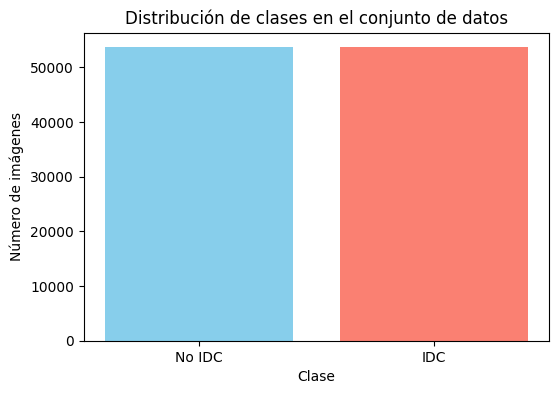


Dimensiones de las imágenes:
         Height     Width  Channels
count  107268.0  107268.0  107268.0
mean      224.0     224.0       3.0
std         0.0       0.0       0.0
min       224.0     224.0       3.0
25%       224.0     224.0       3.0
50%       224.0     224.0       3.0
75%       224.0     224.0       3.0
max       224.0     224.0       3.0

Estadísticas de intensidad de color:
                Mean            Std            Min            Max
count  107268.000000  107268.000000  107268.000000  107268.000000
mean      173.723660      36.945395      41.841155     246.479808
std        30.865087       8.551067      23.447323       9.454729
min        28.196728       1.044727       0.000000     127.000000
25%       148.593906      31.316931      26.000000     244.000000
50%       172.734299      35.584761      39.000000     249.000000
75%       199.217564      41.421684      55.000000     253.000000
max       245.681368     108.170610     226.000000     255.000000


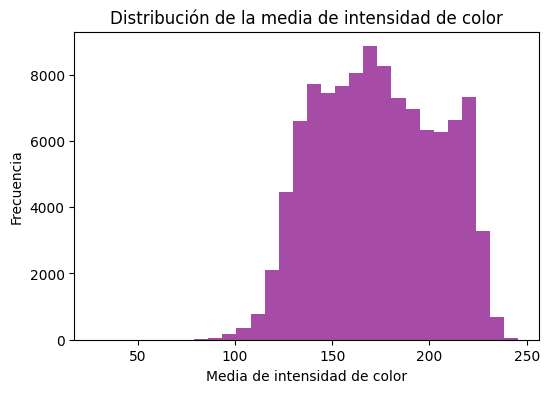

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el DataFrame desde el archivo Pickle
image_df = pd.read_pickle('/content/drive/MyDrive/TFM/balanced_images.pkl')

import matplotlib.pyplot as plt
import pandas as pd

# 1. Distribución de clases
class_counts = image_df['label'].value_counts()
print("Distribución de clases:")
print(class_counts)

# Visualizar la distribución de clases
plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, class_counts.values, color=['skyblue', 'salmon'])
plt.xticks([0, 1], ['No IDC', 'IDC'])
plt.xlabel('Clase')
plt.ylabel('Número de imágenes')
plt.title('Distribución de clases en el conjunto de datos')
plt.show()

# 2. Verificación de dimensiones de imágenes
dimensions = [img.shape for img in image_df['image']]
dimension_df = pd.DataFrame(dimensions, columns=['Height', 'Width', 'Channels'])
print("\nDimensiones de las imágenes:")
print(dimension_df.describe())

# 3. Estadísticas de intensidad de color
pixel_stats = []
for img in image_df['image']:
    pixel_stats.append([img.mean(), img.std(), img.min(), img.max()])

pixel_stats_df = pd.DataFrame(pixel_stats, columns=['Mean', 'Std', 'Min', 'Max'])
print("\nEstadísticas de intensidad de color:")
print(pixel_stats_df.describe())

# Visualizar la distribución de la media de intensidad
plt.figure(figsize=(6, 4))
plt.hist(pixel_stats_df['Mean'], bins=30, color='purple', alpha=0.7)
plt.xlabel('Media de intensidad de color')
plt.ylabel('Frecuencia')
plt.title('Distribución de la media de intensidad de color')
plt.show()

**Los datos del conjunto de imágenes de cáncer de mama, ya balanceados entre las dos clases: “No IDC” (No Carcinoma Ductal Invasivo) y “IDC” (Carcinoma Ductal Invasivo), con 53,634 imágenes por clase.

	1.	Distribución de Clases:
	•	Las clases están perfectamente equilibradas, con un número igual de imágenes para “No IDC” y “IDC”. Este balance es importante para evitar sesgos durante el entrenamiento del modelo.
	2.	Dimensiones de las Imágenes:
	•	Todas las imágenes tienen dimensiones uniformes de 224x224 píxeles con 3 canales de color (RGB). Este tamaño estándar facilita el procesamiento y asegura que todas las imágenes sean comparables.
	3.	Estadísticas de Intensidad de Color:
	•	La media de la intensidad de color de las imágenes es de aproximadamente 173 en una escala de 0 a 255, con una desviación estándar de alrededor de 30, lo que indica una variabilidad moderada en los tonos de color de las imágenes.
	•	La distribución de la media de intensidad de color muestra una tendencia hacia intensidades más altas (entre 150 y 200), lo que podría reflejar características específicas del tejido mamario capturado en las imágenes.**

# Elegimos un modelo de red neuronal convolucional (CNN) porque es especialmente adecuado para la clasificación de imágenes.

**Modelo de Red Neuronal Convolucional (CNN):
Se ha elegido un modelo de red neuronal convolucional (CNN) porque este tipo de redes es altamente eficaz para la clasificación de imágenes. Las CNN están diseñadas para reconocer patrones espaciales y características en los datos visuales, lo que las hace ideales para tareas de detección de objetos o clasificación, como en este caso, la detección de cáncer a partir de imágenes histopatológicas.**

# Paso 1: Importar las librerías necesarias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paso 2: Preparar el conjunto de datos
Realizaremos un muestreo aleatorio para seleccionar 20,000 muestras:

In [ ]:
# Cargar el DataFrame
df = pd.read_pickle('/content/drive/MyDrive/TFM/balanced_images.pkl')

# Seleccionar 20,000 muestras aleatorias de cada clase
df_idc = df[df['label'] == 1].sample(n=20000, random_state=42)
df_no_idc = df[df['label'] == 0].sample(n=20000, random_state=42)

# Concatenar ambos subconjuntos
df_sampled = pd.concat([df_idc, df_no_idc]).reset_index(drop=True)

# Convertir las imágenes a arrays de numpy
X = np.array([np.array(image) for image in df_sampled['image']])  # Utiliza 'image' en lugar del nombre incorrecto
y = np.array(df_sampled['label'])

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 3: Construir el modelo de red neuronal convolucional (CNN)

In [ ]:
# Definir el modelo
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Paso 4: Entrenar el modelo


In [ ]:
# Crear un generador de datos para el entrenamiento
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Entrenar el modelo
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) // 32,
                    validation_data=(X_test / 255.0, y_test),
                    epochs=20)

Epoch 1/20
1000/1000 [==============================] - 456s 454ms/step - loss: 0.4583 - accuracy: 0.8021 - val_loss: 0.4159 - val_accuracy: 0.8136
Epoch 2/20
1000/1000 [==============================] - 437s 437ms/step - loss: 0.4262 - accuracy: 0.8201 - val_loss: 0.3941 - val_accuracy: 0.8365
Epoch 3/20
1000/1000 [==============================] - 432s 432ms/step - loss: 0.4048 - accuracy: 0.8303 - val_loss: 0.4262 - val_accuracy: 0.8349
Epoch 4/20
1000/1000 [==============================] - 439s 439ms/step - loss: 0.3895 - accuracy: 0.8384 - val_loss: 0.3387 - val_accuracy: 0.8558
Epoch 5/20
1000/1000 [==============================] - 441s 440ms/step - loss: 0.3708 - accuracy: 0.8475 - val_loss: 0.3459 - val_accuracy: 0.8619
Epoch 6/20
1000/1000 [==============================] - 436s 436ms/step - loss: 0.3615 - accuracy: 0.8504 - val_loss: 0.3238 - val_accuracy: 0.8671
Epoch 7/20
1000/1000 [==============================] - 435s 435ms/step - loss: 0.3566 - accuracy: 0.8525 - val_

Estructura del modelo:
El modelo CNN utilizado en este caso tiene 7 capas en total:

	1.	Capas Convolucionales (Conv2D):
	•	Primera capa: 32 filtros con un tamaño de kernel de (3, 3) y función de activación ‘relu’. Esta capa extrae características básicas de la imagen.
	•	Segunda capa: 64 filtros con un tamaño de kernel de (3, 3) y función de activación ‘relu’. Incrementa la complejidad de las características aprendidas.
	•	Tercera capa: 128 filtros con un tamaño de kernel de (3, 3) y función de activación ‘relu’. Extrae características más complejas.
	2.	Capas de Max-Pooling (MaxPooling2D):
	•	Cada capa convolucional está seguida por una capa de max-pooling con un tamaño de pool de (2, 2). Estas capas reducen la dimensionalidad de las características aprendidas y ayudan a generalizar mejor el modelo.
	3.	Capas Densas (Dense):
	•	Primera capa densa: 128 neuronas con función de activación ‘relu’. Esta capa aprende patrones no lineales combinando todas las características detectadas.
	•	Dropout: Aplicado con un factor de 0.5 para prevenir el sobreajuste.
	•	Capa de salida: Una neurona con función de activación ‘sigmoid’, que proporciona la probabilidad de la clasificación binaria (cáncer o no cáncer).

# Paso 5: Evaluar el modelo

In [ ]:
# Evaluar el rendimiento del modelo
loss, accuracy = model.evaluate(X_test / 255.0, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Guardar el modelo
model.save('/content/drive/MyDrive/TFM/modelo_cancer.h5')

250/250 [==============================] - 20s 81ms/step - loss: 0.3464 - accuracy: 0.8454
Accuracy: 84.54%


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**
Este modelo CNN con múltiples capas convolucionales y de pooling permite captar patrones desde los más simples hasta los más complejos en las imágenes, proporcionando una alta capacidad de generalización para la clasificación de imágenes.**

# Código para Calcular y Visualizar la Matriz de Confusión

250/250 [==============================] - 20s 81ms/step


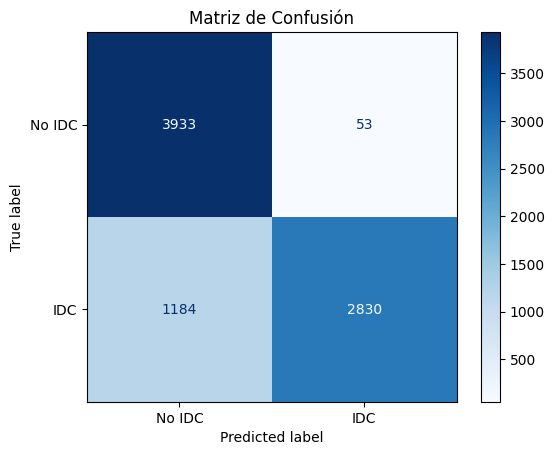

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


y_pred = model.predict(X_test / 255.0)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Convierte las predicciones de probabilidades en clases binarias

# Calcula la matriz de confusión
cm = confusion_matrix(y_test, y_pred_classes)

# Visualiza la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No IDC', 'IDC'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()

Interpretación de la Matriz de Confusión:

	1.	Eje de las Filas (“True label”): Representa las clases verdaderas (reales) del conjunto de prueba.
	•	No IDC (No Invasive Ductal Carcinoma): Son las imágenes que en realidad no tienen cáncer.
	•	IDC (Invasive Ductal Carcinoma): Son las imágenes que en realidad tienen cáncer.
	2.	Eje de las Columnas (“Predicted label”): Representa las predicciones realizadas por el modelo.
	•	No IDC: Predicciones en las que el modelo ha clasificado la imagen como no cáncer.
	•	IDC: Predicciones en las que el modelo ha clasificado la imagen como cáncer.

Análisis de los Valores:

	•	3933 (True Negative - TN): El modelo predijo correctamente que 3933 imágenes no tenían IDC (cáncer) cuando en realidad tampoco lo tenían.
	•	53 (False Positive - FP): El modelo predijo incorrectamente que 53 imágenes tenían IDC (cáncer) cuando en realidad no lo tenían.
	•	1184 (False Negative - FN): El modelo predijo incorrectamente que 1184 imágenes no tenían IDC (cáncer) cuando en realidad sí lo tenían.
	•	2830 (True Positive - TP): El modelo predijo correctamente que 2830 imágenes tenían IDC (cáncer) cuando efectivamente lo tenían.

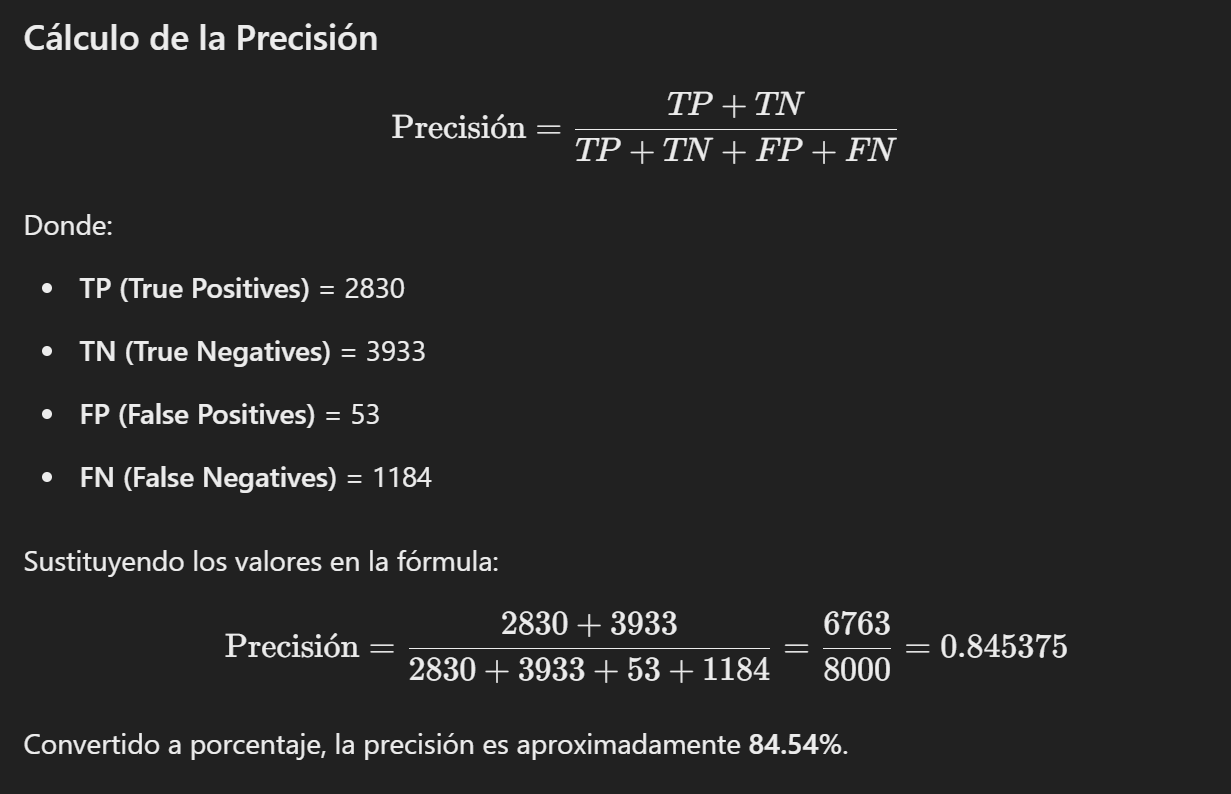

# Crear la app de Escritorio

In [ ]:
import tkinter as tk
from tkinter import filedialog
from tkinter import messagebox
from tkinter.simpledialog import askstring
from PIL import Image, ImageTk
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import load_model

# Deshabilitar los logs de TensorFlow y redirigirlos a un archivo
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Deshabilitar logs de TensorFlow
log_file = open(os.devnull, 'w')  # Redirigir la salida estándar a null para evitar mensajes en consola
tf.get_logger().handlers[0].stream = log_file

# Cargar el modelo guardado en formato .h5
try:
    model = load_model('C:\\cancer\\modelo_cancer.h5')
except Exception as e:
    messagebox.showerror("Error", f"No se pudo cargar el modelo.\nAsegúrese de que el archivo 'modelo_cancer.h5' esté en la ubicación correcta.")
    exit()  # Salir si no se puede cargar el modelo

# Función para cargar la imagen y predecir
def cargar_imagen():
    # Solicitar el nombre del paciente
    nombre_paciente = askstring("Nombre del Paciente", "Ingrese el nombre del paciente:")

    if not nombre_paciente:
        messagebox.showwarning("Advertencia", "Debe ingresar un nombre para el paciente.")
        return

    # Seleccionar archivo de imagen
    ruta_imagen = filedialog.askopenfilename(
        filetypes=[("Imagen", "*.png *.jpg *.jpeg")])

    if ruta_imagen:
        try:
            # Abrir la imagen
            img = Image.open(ruta_imagen)

            # Verificar el tamaño de la imagen
            if img.size != (224, 224):
                messagebox.showerror("Error", "La imagen debe ser de 224x224 píxeles.")
                return

            # Mostrar imagen
            img_tk = ImageTk.PhotoImage(img)
            panel.config(image=img_tk)
            panel.image = img_tk

            # Preprocesar la imagen
            img_array = np.array(img) / 255.0  # Normalizar la imagen
            img_array = np.expand_dims(img_array, axis=0)  # Agregar dimensión batch

            # Realizar la predicción
            messagebox.showinfo("Información", "Realizando la predicción...")
            prediccion = model.predict(img_array)
            resultado = "IDC (Cáncer)" if prediccion[0] > 0.5 else "No IDC (No Cáncer)"

            # Guardar el resultado en un archivo de texto
            with open(f"resultado_{nombre_paciente}.txt", "w") as file:
                file.write(f"El resultado del paciente {nombre_paciente} es: {resultado}\n")

            # Mostrar el resultado en la ventana principal
            label_resultado.config(text=f"Resultado guardado en 'resultado_{nombre_paciente}.txt'")
            ventana.update_idletasks()  # Forzar la actualización de la interfaz gráfica
        except Exception as e:
            messagebox.showerror("Error", f"Ocurrió un error al procesar la imagen o realizar la predicción.\n{e}")

# Crear ventana principal
ventana = tk.Tk()
ventana.title("Clasificación de Cáncer")
ventana.geometry("1200x600")

# Crear texto de bienvenida con el nuevo texto
label_texto = tk.Label(ventana, text="Bienvenido al software para predicción de enfermedades, especialmente para la detección de cáncer de mama a partir de imágenes histopatológicas,\n\n"
                                     "Este tiene una efectividad del 84.54% para la predicción\n"
                                     "y fue entrenado con miles de imágenes.", justify="center", font=("Arial", 10, "bold"))
label_texto.pack(pady=10)

# Crear botón de cargar imagen
btn_cargar = tk.Button(ventana, text="Cargar Imagen", command=cargar_imagen)
btn_cargar.pack(pady=10)

# Crear panel para mostrar la imagen
panel = tk.Label(ventana)
panel.pack()

# Crear etiqueta para mostrar el resultado
label_resultado = tk.Label(ventana, text="", font=("Arial", 12, "bold"))
label_resultado.pack(pady=10)

# Crear la nota en la parte inferior
label_nota = tk.Label(ventana, text="Nota: Este software es solo una herramienta de apoyo y debe ser complementado con la valoración de un médico especialista.", fg="red", font=("Arial", 10, "bold"))
label_nota.pack(side="bottom", pady=20)

# Ejecutar la aplicación
ventana.mainloop()

**Nota: Este pedazo de codigo no se puede ejecutar en google colab debido a que ocupa GUI para poder crear las ventanas.**